In [1]:
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os

data = pd.read_csv("breast-cancer.csv")

In [2]:
# List data types of feature columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
X = data.drop(["diagnosis"], axis=1) 
y = data.diagnosis.values

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X.shape
featsel = ExtraTreesClassifier(n_estimators=25) #might need to change this number
featsel = featsel.fit(X, y)
featsel.feature_importances_  
model = SelectFromModel(featsel, prefit=True)
X_new = model.transform(X)
X_new.shape               

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(569, 10)

In [5]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

bagt = BaggingClassifier(n_estimators=30, max_samples=30, random_state=0).fit(x_train, y_train)
# when you change the n_estimators and max samples, it changes the accuracy
y_pred=bagt.predict(x_test)

In [7]:
bagt.score(x_test, y_test)

0.9122807017543859

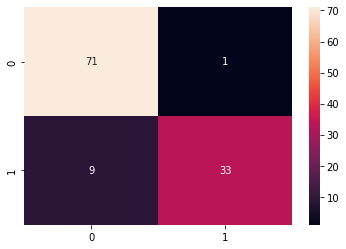

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)
